# PIPELINE EXAMPLES - MODELLING PIPELINE
This example will show you how to:
<ul>
<li>Set up a pipeline using the Pipeline object from sklearn.pipeline.</li>
<li>Perform a grid search for the best parameters using GridSearchCV() from sklearn.model_selection</li>
<li>Analyze the results from the GridSearchCV() and visualize them</li>
</ul>

## 1 - Import Libraries

In [1]:
from pandas import read_csv # For dataframes
from pandas import DataFrame # For dataframes
from numpy import ravel # For matrices
import matplotlib.pyplot as plt # For plotting data
import seaborn as sns # For plotting data
from sklearn.model_selection import train_test_split # For train/test splits
from sklearn.neighbors import KNeighborsClassifier # The k-nearest neighbor classifier
from sklearn.ensemble import RandomForestClassifier # The random forest classifier
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, f_classif # Feature selector
from sklearn.pipeline import Pipeline # For setting up pipeline
# Various pre-processing steps
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler, PowerTransformer, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV # For optimization

## 2 - Load Dataset
For this particular excercise, we'll be using the <b>Ecoli Dataset</b>

In [2]:
# Read ecoli dataset from the UCI ML Repository and store in
# dataframe df
df = read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/ecoli/ecoli.data',
    sep = '\s+',
    header=None)
print(df.head())

            0     1     2     3    4     5     6     7   8
0   AAT_ECOLI  0.49  0.29  0.48  0.5  0.56  0.24  0.35  cp
1  ACEA_ECOLI  0.07  0.40  0.48  0.5  0.54  0.35  0.44  cp
2  ACEK_ECOLI  0.56  0.40  0.48  0.5  0.49  0.37  0.46  cp
3  ACKA_ECOLI  0.59  0.49  0.48  0.5  0.52  0.45  0.36  cp
4   ADI_ECOLI  0.23  0.32  0.48  0.5  0.55  0.25  0.35  cp


## 3 - Prepare the Dataset for Modelling
We’ll ignore the first column, which specifies the sequence name. The last column is the class label. Let’s separate the features from the class label and split the dataset into 2/3 training instances and 1/3 test examples.

In [3]:
# The data matrix X
X = df.iloc[:,1:-1]
# The labels
y = (df.iloc[:,-1:])
 
# Encode the labels into unique integers
encoder = LabelEncoder()
y = encoder.fit_transform(ravel(y))
 
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(
    X,  
    y, 
    test_size=1/3,
    random_state=0)
 
print(X_train.shape)
print(X_test.shape)

(224, 7)
(112, 7)


## 4 - Set Up the Initial Pipeline
For this tutorial, we’ll initially set up a very basic pipeline that consists of the following sequence:
<ul>
<li><b>Scaler:</b> For pre-processing data, i.e., transform the data to zero mean and unit variance using the StandardScaler().</li>
<li><b>Feature selector:</b> Use VarianceThreshold() for discarding features whose variance is less than a certain defined threshold.</li>
<li><b>Classifier:</b> KNeighborsClassifier(), which implements the k-nearest neighbor classifier and selects the class of the majority k points, which are closest to the test example.</li>
</ul>

In [4]:
pipe = Pipeline([
('scaler', StandardScaler()),
('selector', VarianceThreshold()),
('classifier', KNeighborsClassifier())
])

## 5 - Fit the Initial Pipe
The pipe object is simple to understand. It says, scale first, select features second and classify in the end. Let’s call fit() method of the pipe object on our training data and get the training and test scores.

In [5]:
pipe.fit(X_train, y_train)

print('Training set score: ' + str(pipe.score(X_train,y_train)))
print('Test set score: ' + str(pipe.score(X_test,y_test)))

Training set score: 0.8794642857142857
Test set score: 0.8392857142857143


## 6 - Instantiate the Parameters Grid
We can generate a grid (or in this case, a list of grids) for optimize and tune the pipeline. We can iterate not only over the model's hyperparameters, but over every step of the pipeline. In this particular case we'll search for:
<ul>
<li>The best scalers. Instead of just the StandardScaler(), we can try MinMaxScaler(), Normalizer() and MaxAbsScaler().</li>
<li>The best feature selector. We can set a list of grids with different selectors (VarianceThreshold() and SelectKBest()) so we can optimize their particular parameters and then compare them all against each other.</li>
<li>The best estimator. Just like with feature selectors, we can set various grids to optimize various models' (KNeighborsClassifier() and RandomForestClassifier()) individual parameters and them compare them all against each other</li>
</ul>
The parameters variable below is a dictionary that specifies the key:value pairs. Note the key must be written, with a double underscore __ separating the module name that we selected in the Pipeline() and its parameter. Note the following:
<ul>
<li>The scaler has no double underscore, as we have specified a list of objects there.</li>
<li>We would search for the best parameters for both the selector and the estimator. Hence we have specified a list of values for every parameter we want to iterate over to choose from.</li>
</ul>

In [6]:
parameters = [{'scaler': [StandardScaler(), MinMaxScaler(),
                Normalizer(), MaxAbsScaler()],
               'selector' : [VarianceThreshold()],
                'selector__threshold': [0, 0.001, 0.01],
                'classifier__n_neighbors': [1, 3, 5, 7, 10],
                'classifier__p': [1, 2],
                'classifier__leaf_size': [1, 5, 10, 15]
},
{'scaler': [StandardScaler(), MinMaxScaler(),
            Normalizer(), MaxAbsScaler()],
            'selector' : [SelectKBest()],
            'selector__score_func': [mutual_info_classif, f_classif],
            'selector__k' : [2, 4],
            'classifier__n_neighbors': [1, 3, 5, 7, 10],
            'classifier__p': [1, 2],
            'classifier__leaf_size': [1, 5, 10, 15]
},
{'scaler': [StandardScaler(), MinMaxScaler(),
            Normalizer(), MaxAbsScaler()],
            'selector' : [SelectKBest()],
            'selector__score_func': [mutual_info_classif, f_classif],
            'selector__k' : [2, 4],
            'classifier' : [RandomForestClassifier()],
            'classifier__n_estimators': [10, 15],
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [5, 10, 15]
},
{'scaler': [StandardScaler(), MinMaxScaler(),
            Normalizer(), MaxAbsScaler()],
            'selector' : [VarianceThreshold()],
            'selector__threshold': [0, 0.001, 0.01],
            'classifier' : [RandomForestClassifier()],
            'classifier__n_estimators': [10, 15],
            'classifier__criterion': ['gini', 'entropy'],
            'classifier__max_depth': [5, 10, 15]
}]

## 7 - Execute the search over the pipeline
The pipe along with the above list of parameters are then passed to a GridSearchCV() object, that searches the parameters space for the best set of parameters as shown below:

In [7]:
grid = GridSearchCV(pipe, parameters, cv=2, verbose=1).fit(X_train, y_train)

print('Training set score: ' + str(grid.score(X_train, y_train)))
print('Test set score: ' + str(grid.score(X_test, y_test)))

Fitting 2 folds for each of 1456 candidates, totalling 2912 fits


C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\model_selection\_split.py:668: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  % (min_groups, self.n_splits)), UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWar

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWar

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWar

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWar

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWar

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb /

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWar

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWar

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWar

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWar

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWar

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWar

C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWarning)
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:116: RuntimeWarning: divide by zero encountered in true_divide
  f = msb / msw
C:\Users\sebastiangiraldo\PycharmProjects\cap_pipelines\venv\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:115: UserWarning: Features [3] are constant.
  UserWar

Training set score: 0.9866071428571429
Test set score: 0.8214285714285714


## 8 - Access the best estimator and the best parameters thrown by the search

In [8]:
# Access the best set of parameters
best_params = grid.best_params_
print(best_params)
# Stores the optimum model in best_pipe
best_pipe = grid.best_estimator_
print(best_pipe)

{'classifier': RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=10), 'classifier__criterion': 'entropy', 'classifier__max_depth': 10, 'classifier__n_estimators': 10, 'scaler': StandardScaler(), 'selector': VarianceThreshold(threshold=0.001), 'selector__threshold': 0.001}
Pipeline(steps=[('scaler', StandardScaler()),
                ('selector', VarianceThreshold(threshold=0.001)),
                ('classifier',
                 RandomForestClassifier(criterion='entropy', max_depth=10,
                                        n_estimators=10))])


## 9 - Analyze the Results
One practical way in which you can get a hold of the results is to construct a DataFrame to get a detailed view of every iteration

In [12]:
result_df = DataFrame.from_dict(grid.cv_results_, orient='columns')
print(result_df.head())

   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.004998      0.000038         0.005016        0.000015   
1       0.004290      0.000289         0.005055        0.000938   
2       0.003987      0.000022         0.005019        0.000017   
3       0.005999      0.002000         0.005497        0.000505   
4       0.004515      0.000516         0.005504        0.000523   

  param_classifier__leaf_size param_classifier__n_neighbors  \
0                           1                             1   
1                           1                             1   
2                           1                             1   
3                           1                             1   
4                           1                             1   

  param_classifier__p      param_scaler       param_selector  \
0                   1  StandardScaler()  VarianceThreshold()   
1                   1  StandardScaler()  VarianceThreshold()   
2                   1  Sta

Because of the number of iterations, a DataFrame can get too big to analyze. Hence, it can be a good idea to plot the results to have a broader view. Here we'll be plotting the results against the different values of p (this will show only the KNN iterations as RF does not have this parameter)

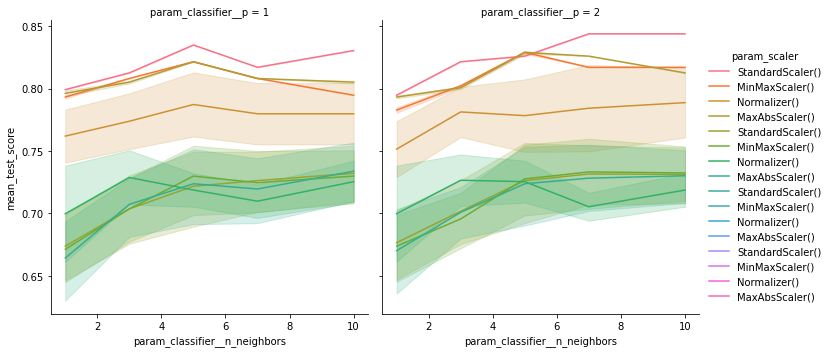

In [10]:
sns.relplot(data=result_df,
	kind='line',
	x='param_classifier__n_neighbors',
	y='mean_test_score',
	hue='param_scaler',
	col='param_classifier__p')
plt.show()

We can also plot the results against the different leaf sizes to analyze them from another point of view (this will show only the KNN iterations as RF does not have this parameter)

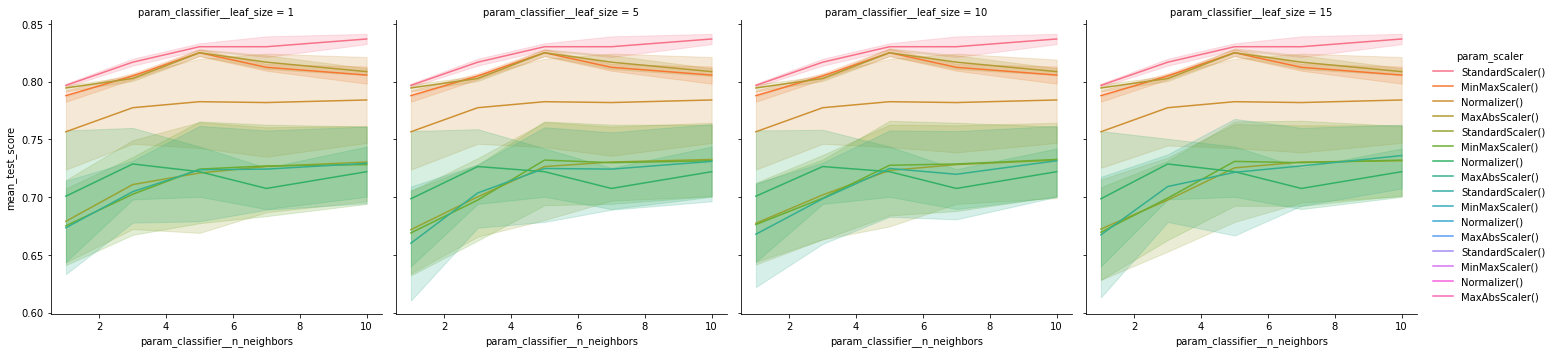

In [11]:
sns.relplot(data=result_df,
            kind='line',
            x='param_classifier__n_neighbors',
            y='mean_test_score',
            hue='param_scaler',
            col='param_classifier__leaf_size')
plt.show()